# Eigenpair Flow Demonstration

This notebook demonstrates the use of the `eigenpairflow` library to track the eigenvalues and eigenvectors of a one-parameter family of symmetric matrices $A(t)$.

## Mathematical Background

Given a one-parameter family of symmetric matrices $A(t)$, we consider its eigenvalue decomposition:
$$ A(t) = Q(t) \Lambda(t) Q(t)^T $$
where $Q(t)$ is an orthogonal matrix of eigenvectors and $\Lambda(t)$ is a diagonal matrix of eigenvalues.

By differentiating the equation $A(t)Q(t) = Q(t)\Lambda(t)$, we can derive a system of ordinary differential equations (ODEs) for $Q(t)$ and $\Lambda(t)$. The core equation for the derivatives is:
$$ F(t) = \frac{d\Lambda}{dt} + [H(t), \Lambda(t)] $$
where $F(t) = Q(t)^T \frac{dA}{dt} Q(t)$ and $H(t) = Q(t)^T \frac{dQ}{dt}$ is a skew-symmetric matrix.

The `eigenpairflow` library solves this system of ODEs to track the continuous evolution of eigenvalues and eigenvectors.

In [1]:
from collections import namedtuple

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from eigenpairflow.main import (
    create_n_partite_graph,
    track_and_analyze_eigenvalue_decomposition,
)
from eigenpairflow.magnitude import (
    calculate_magnitudes,
    calculate_pseudo_magnitudes,
    get_zero_indices,
)
from eigenpairflow.visualization import plot_eigen_tracking_results

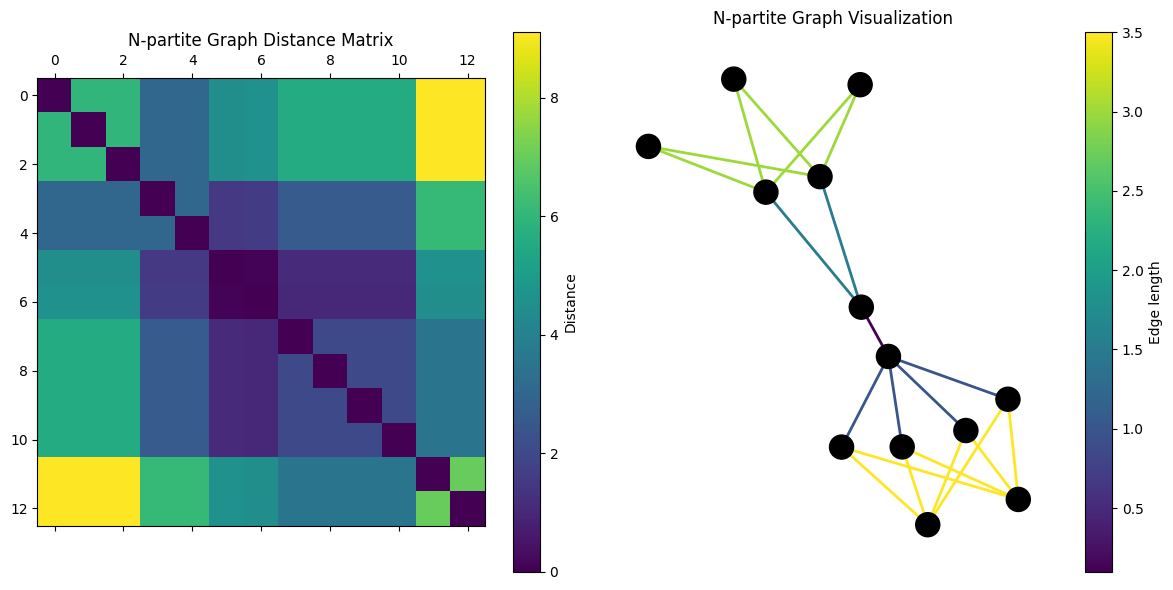

In [2]:
# --- Problem Setup: Create an n-partite graph ---
partition_sizes = [3, 2, 1, 1, 4, 2]
lengths = {
    (0, 1): 3.0,
    (1, 2): 1.5,
    (2, 3): 0.1,
    (3, 4): 1.0,
    (4, 5): 3.5,
}

G = create_n_partite_graph(partition_sizes, lengths)

# --- Visualize the graph distance matrix and the graph initially ---
D = np.array(nx.floyd_warshall_numpy(G, weight="length"))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
cmap = plt.cm.viridis

im = axes[0].matshow(D, cmap=cmap)
axes[0].set_title("N-partite Graph Distance Matrix")
fig.colorbar(im, ax=axes[0], label="Distance")

pos = nx.spring_layout(G, seed=42)
node_colors = ["black"] * len(G.nodes())
edge_lengths_list = [G[u][v]["length"] for u, v in G.edges()]

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    edge_color=edge_lengths_list,
    width=2.0,
    edge_cmap=cmap,
    ax=axes[1],
)
axes[1].set_title("N-partite Graph Visualization")
sm = plt.cm.ScalarMappable(
    cmap=cmap, norm=plt.Normalize(vmin=min(edge_lengths_list), vmax=max(edge_lengths_list))
)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes[1], label="Edge length")

plt.tight_layout()
plt.show()


--- Starting tracking and analysis WITH correction ---


Plotting results with correction...


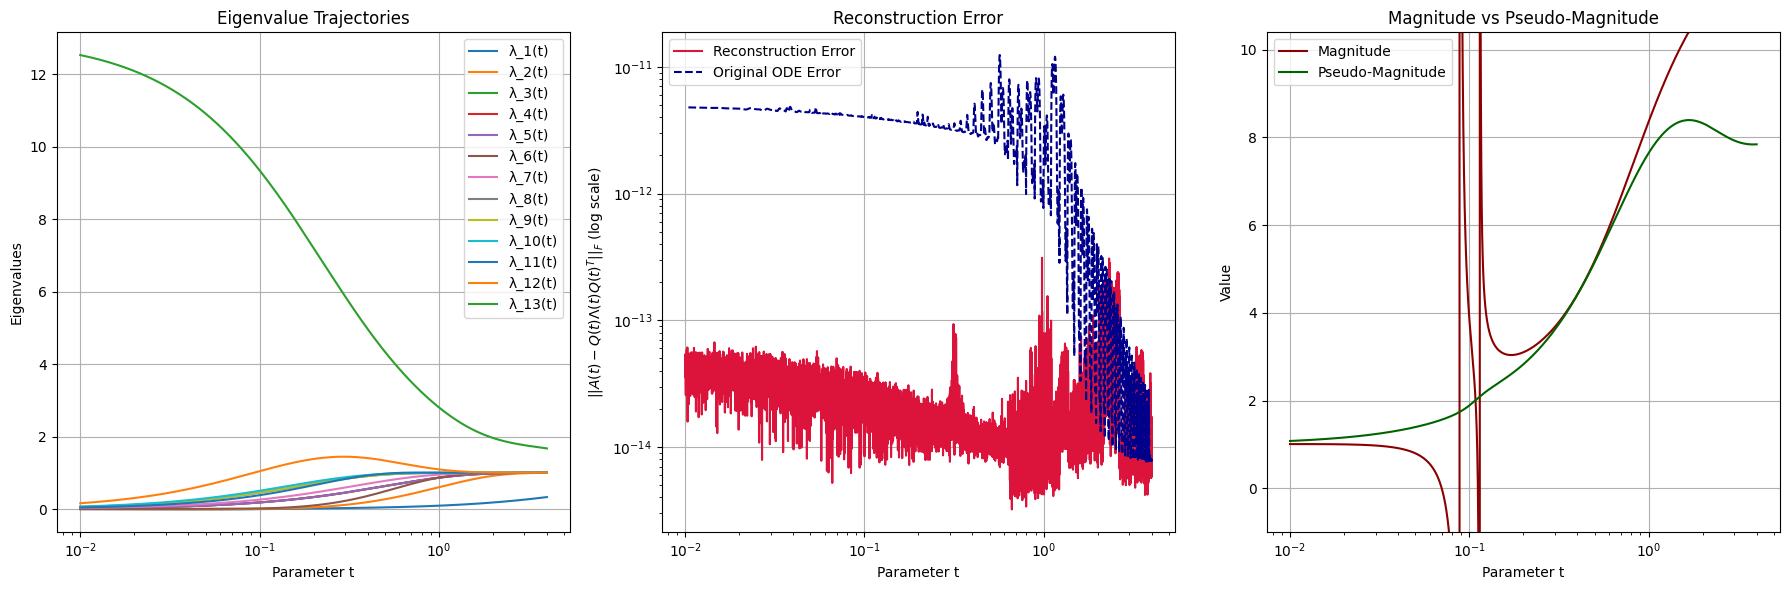


--- Starting tracking and analysis WITHOUT correction ---


Plotting results without correction...


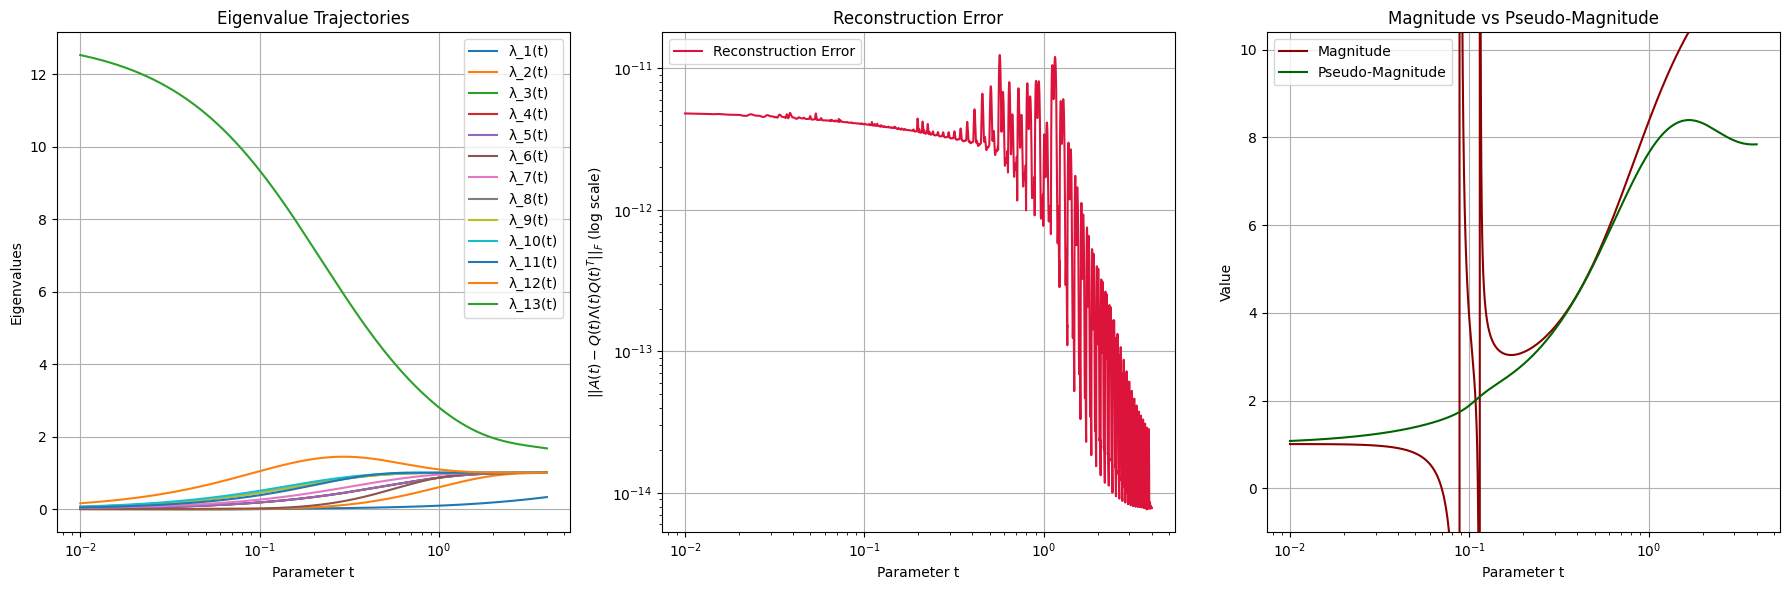

In [3]:
# Define a namedtuple to hold all data for plotting, mimicking the old results object structure.
PlottingResults = namedtuple(
    "PlottingResults",
    [
        "t_eval",
        "Qs",
        "Lambdas",
        "magnitudes",
        "pseudo_magnitudes",
        "errors",
        "zero_indices",
        "errors_before_correction",
        "success",
        "message",
    ],
)

# --- Analysis with correction ---
print("\n--- Starting tracking and analysis WITH correction ---")
results_corrected, D_corrected = track_and_analyze_eigenvalue_decomposition(
    G, apply_correction=True
)
if results_corrected.success:
    # Calculate magnitudes separately
    zero_indices_c = get_zero_indices(results_corrected.Lambdas)
    mags_c = calculate_magnitudes(
        results_corrected.Qs, results_corrected.Lambdas, D_corrected
    )
    pseudo_mags_c = calculate_pseudo_magnitudes(
        results_corrected.Qs, results_corrected.Lambdas, D_corrected, zero_indices_c
    )

    # Combine into a single object for plotting
    plot_data_c = PlottingResults(
        t_eval=results_corrected.t_eval,
        Qs=results_corrected.Qs,
        Lambdas=results_corrected.Lambdas,
        magnitudes=mags_c,
        pseudo_magnitudes=pseudo_mags_c,
        errors=results_corrected.errors,
        zero_indices=zero_indices_c,
        errors_before_correction=results_corrected.errors_before_correction,
        success=True,
        message="",
    )
    print("Plotting results with correction...")
    plot_eigen_tracking_results(plot_data_c)
else:
    print(f"Tracking failed: {results_corrected.message}")

# --- Analysis without correction ---
print("\n--- Starting tracking and analysis WITHOUT correction ---")
results_original, D_original = track_and_analyze_eigenvalue_decomposition(
    G, apply_correction=False
)
if results_original.success:
    # Calculate magnitudes separately
    zero_indices_o = get_zero_indices(results_original.Lambdas)
    mags_o = calculate_magnitudes(results_original.Qs, results_original.Lambdas, D_original)
    pseudo_mags_o = calculate_pseudo_magnitudes(
        results_original.Qs, results_original.Lambdas, D_original, zero_indices_o
    )

    # Combine into a single object for plotting
    plot_data_o = PlottingResults(
        t_eval=results_original.t_eval,
        Qs=results_original.Qs,
        Lambdas=results_original.Lambdas,
        magnitudes=mags_o,
        pseudo_magnitudes=pseudo_mags_o,
        errors=results_original.errors,
        zero_indices=zero_indices_o,
        errors_before_correction=None,
        success=True,
        message="",
    )
    print("Plotting results without correction...")
    plot_eigen_tracking_results(plot_data_o)
else:
    print(f"Tracking failed: {results_original.message}")